## Retrieve the data from HBASE

In [1]:
import happybase
connection = happybase.Connection(port=9090)
print(connection.tables())

[b'linkshare', b'linkshare1', b'linkshare2', b'linkshare4', b'mytable', b'mytable2', b'prj_pfx_mytable31', b'prj_pfx_user4table3', b'prj_pfx_wenjie3', b'shopee', b'shopee1', b'tweets_table', b'user4table', b'user4table2', b'wenjie', b'wenjie2']


In [2]:
shopee_table = connection.table('shopee1')
result = shopee_table.scan()
rows = [row for row in result]

In [3]:
import pandas as pd
df = pd.DataFrame(rows)
#pd.set_option("max_colwidth", None)


In [4]:
df.head()

,0,1
0,b'0',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
1,b'1',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
2,b'10',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
3,b'100',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
4,b'1000',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."


In [5]:
print(df.columns)

RangeIndex(start=0, stop=2, step=1)


In [6]:
df.columns = ['column1_name', 'column2_name']

In [7]:
print(df.columns)

Index(['column1_name', 'column2_name'], dtype='object')


In [8]:
df.head()

,column1_name,column2_name
0,b'0',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
1,b'1',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
2,b'10',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
3,b'100',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."
4,b'1000',"{b'cf1:brand': b'Apple', b'cf1:delivery_servic..."


In [9]:
import pandas as pd

# Split the dictionary in column2_name into separate columns
df = pd.concat([df.drop('column2_name', axis=1), df['column2_name'].apply(pd.Series)], axis=1)

In [10]:
df.head()

,column1_name,b'cf1:brand',b'cf1:delivery_service',b'cf1:description',b'cf1:model',b'cf1:product_quality',b'cf1:rating',b'cf1:seller_service',b'cf1:username',b'cf1:variation',b'cf2:comment'
0,b'0',b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'n*****s',"b'Space Black,128GB'",b'performance high quality fast delivery quali...
1,b'1',b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'mumys_baby',"b'Deep Purple,256GB'",b'performance high quality excellent good prod...
2,b'10',b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'rashidmailbox',"b'Deep Purple,128GB'",b'quality best performance best fast delivery ...
3,b'100',b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-...,b'5',b'5',b'5.0',b'm*****5',"b'Silver,256GB'",b'best'
4,b'1000',b'Apple',b'nan',"b""Shoot 4K videos, beautiful portraits, and sw...",b'Apple iPhone 11 128GB',b'5',b'5',b'nan',b'a*****4',b'White',b'buy shipped soon placed buy excellent servic...


In [11]:
df.drop(columns=['column1_name'], inplace=True)

In [12]:
df.head()

,b'cf1:brand',b'cf1:delivery_service',b'cf1:description',b'cf1:model',b'cf1:product_quality',b'cf1:rating',b'cf1:seller_service',b'cf1:username',b'cf1:variation',b'cf2:comment'
0,b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'n*****s',"b'Space Black,128GB'",b'performance high quality fast delivery quali...
1,b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'mumys_baby',"b'Deep Purple,256GB'",b'performance high quality excellent good prod...
2,b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'Apple iPhone 14 Pro',b'5',b'5',b'5.0',b'rashidmailbox',"b'Deep Purple,128GB'",b'quality best performance best fast delivery ...
3,b'Apple',b'5.0',"b""iPhone\\u00a014\\u00a0Pro. Capture incredibl...",b'[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-...,b'5',b'5',b'5.0',b'm*****5',"b'Silver,256GB'",b'best'
4,b'Apple',b'nan',"b""Shoot 4K videos, beautiful portraits, and sw...",b'Apple iPhone 11 128GB',b'5',b'5',b'nan',b'a*****4',b'White',b'buy shipped soon placed buy excellent servic...


In [13]:
idx_dic = {}
for col in df.columns:
    idx_dic[col] = df.columns.get_loc(col)
print(idx_dic)

{b'cf1:brand': 0, b'cf1:delivery_service': 1, b'cf1:description': 2, b'cf1:model': 3, b'cf1:product_quality': 4, b'cf1:rating': 5, b'cf1:seller_service': 6, b'cf1:username': 7, b'cf1:variation': 8, b'cf2:comment': 9}


In [14]:
# Decode column names
df.columns = [col.decode() for col in df.columns]

# Decode cell values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)

In [15]:
df.head()

,cf1:brand,cf1:delivery_service,cf1:description,cf1:model,cf1:product_quality,cf1:rating,cf1:seller_service,cf1:username,cf1:variation,cf2:comment
0,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,5,5.0,n*****s,"Space Black,128GB",performance high quality fast delivery quality...
1,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,5,5.0,mumys_baby,"Deep Purple,256GB",performance high quality excellent good produc...
2,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,5,5.0,rashidmailbox,"Deep Purple,128GB",quality best performance best fast delivery it...
3,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-20...,5,5,5.0,m*****5,"Silver,256GB",best
4,Apple,nan,"Shoot 4K videos, beautiful portraits, and swee...",Apple iPhone 11 128GB,5,5,nan,a*****4,White,buy shipped soon placed buy excellent service ...


In [16]:
#nltk.download('punkt')

In [17]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming the data is stored in a pandas DataFrame called 'df'
comment = df['cf2:comment'].tolist()

# Tokenize each comment using NLTK's word_tokenize() function
tokenized_comment = [word_tokenize(desc) for desc in comment]

# Print the tokenized comment for the first 5 rows
for i in range(5):
    print(tokenized_comment[i])


['performance', 'high', 'quality', 'fast', 'delivery', 'quality', 'excellent', 'authentic', 'product', 'apple', 'well', 'packed', 'received', 'good', 'condition', 'good', 'packaging', 'fast', 'delivery', 'machine']
['performance', 'high', 'quality', 'excellent', 'good', 'product', 'recommended', 'well', 'packed', 'received', 'good', 'term', 'without', 'damage']
['quality', 'best', 'performance', 'best', 'fast', 'delivery', 'item', 'well', 'packed', 'original', 'trusted', 'hopefully', 'get', 'best', 'offer', 'better', 'price', 'future', 'complete', 'apple', 'ecosystem', 'without', 'need', 'crack', 'bank']
['best']
['buy', 'shipped', 'soon', 'placed', 'buy', 'excellent', 'service', 'seller', 'let', 'go', 'hand', 'request', 'item', 'packed', 'box', 'unfortunately', 'seller', 'packed', 'regular', 'parcel', 'instead', 'luckily', 'received', 'item', 'safely', 'without', 'defect', 'ut', 'want', 'take', 'risk']


In [18]:
null_values = df.isnull().sum()
print(null_values)

cf1:brand               0
cf1:delivery_service    0
cf1:description         0
cf1:model               0
cf1:product_quality     0
cf1:rating              0
cf1:seller_service      0
cf1:username            0
cf1:variation           0
cf2:comment             0
dtype: int64


In [19]:
def apply_rating(rating):
    if(rating > 3):
        return "positive"
    else:
        return "negative"

In [20]:
print(df.dtypes)

cf1:brand               object
cf1:delivery_service    object
cf1:description         object
cf1:model               object
cf1:product_quality     object
cf1:rating              object
cf1:seller_service      object
cf1:username            object
cf1:variation           object
cf2:comment             object
dtype: object


In [21]:
df['cf1:rating'] = df['cf1:rating'].astype(int)

In [22]:
print(df.dtypes)

cf1:brand               object
cf1:delivery_service    object
cf1:description         object
cf1:model               object
cf1:product_quality     object
cf1:rating               int64
cf1:seller_service      object
cf1:username            object
cf1:variation           object
cf2:comment             object
dtype: object


In [23]:
null_values = df.isnull().sum()
print(null_values)

cf1:brand               0
cf1:delivery_service    0
cf1:description         0
cf1:model               0
cf1:product_quality     0
cf1:rating              0
cf1:seller_service      0
cf1:username            0
cf1:variation           0
cf2:comment             0
dtype: int64


In [24]:
df['cf1:rating'] = df['cf1:rating'].apply(apply_rating)

In [25]:
df.head()

,cf1:brand,cf1:delivery_service,cf1:description,cf1:model,cf1:product_quality,cf1:rating,cf1:seller_service,cf1:username,cf1:variation,cf2:comment
0,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,n*****s,"Space Black,128GB",performance high quality fast delivery quality...
1,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,mumys_baby,"Deep Purple,256GB",performance high quality excellent good produc...
2,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,rashidmailbox,"Deep Purple,128GB",quality best performance best fast delivery it...
3,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-20...,5,positive,5.0,m*****5,"Silver,256GB",best
4,Apple,nan,"Shoot 4K videos, beautiful portraits, and swee...",Apple iPhone 11 128GB,5,positive,nan,a*****4,White,buy shipped soon placed buy excellent service ...


In [26]:
df['cf1:rating'].value_counts()

positive    3385
negative     114
Name: cf1:rating, dtype: int64

### Rename the columns into suitable names

In [27]:
df = df.rename(columns={'cf1:brand': 'brand', 'cf1:delivery_service': 'delivery_service',
                        'cf1:description': 'description', 'cf1:model': 'model',
                        'cf1:product_quality': 'product_quality', 'cf1:rating': 'rating',
                        'cf1:seller_service': 'seller_service', 'cf1:username': 'username',
                        'cf1:variation': 'variation', 'cf2:comment': 'comment'})
df.head()

,brand,delivery_service,description,model,product_quality,rating,seller_service,username,variation,comment
0,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,n*****s,"Space Black,128GB",performance high quality fast delivery quality...
1,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,mumys_baby,"Deep Purple,256GB",performance high quality excellent good produc...
2,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,rashidmailbox,"Deep Purple,128GB",quality best performance best fast delivery it...
3,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-20...,5,positive,5.0,m*****5,"Silver,256GB",best
4,Apple,nan,"Shoot 4K videos, beautiful portraits, and swee...",Apple iPhone 11 128GB,5,positive,nan,a*****4,White,buy shipped soon placed buy excellent service ...


## Data Spliting

In [28]:
# Select the first 2700 samples for the training set
norm_train_text = df.comment[:2700]

# Select the remaining samples for the test set
norm_test_text = df.comment[2700:]

# Print the number of samples in each set
print("Number of samples in the training set: ", len(norm_train_text))
print("Number of samples in the test set: ", len(norm_test_text))

Number of samples in the training set:  2700
Number of samples in the test set:  799


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# count vectorizer
cv2 = CountVectorizer(min_df = 0, max_df = 1, binary = False, ngram_range = (1,3))
cv_train_text = cv2.fit_transform(norm_train_text)
cv_test_text = cv2.transform(norm_test_text)

In [30]:
print('BOW_cv_train : ', cv_train_text.shape)
print('BOW_cv_test : ', cv_test_text.shape)

BOW_cv_train :  (2700, 24621)
BOW_cv_test :  (799, 24621)


In [31]:
# tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv2 = TfidfVectorizer(min_df = 0,max_df = 1,use_idf = True,ngram_range = (1,3))
tv_train_text = tv2.fit_transform(norm_train_text)
tv_test_text = tv2.transform(norm_test_text)

In [32]:
print('Tfidf_train : ',tv_train_text.shape)
print('Tfidf_test : ',tv_test_text.shape)

Tfidf_train :  (2700, 24621)
Tfidf_test :  (799, 24621)


In [33]:
from sklearn.preprocessing import LabelBinarizer
lb2 = LabelBinarizer()
score_data = lb2.fit_transform(df['rating'])
print(score_data.shape)

(3499, 1)


In [34]:
# spliting the sentiment data
train_score = score_data[:2700]
test_score = score_data[2700:]

## Model

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud,STOPWORDS

### Naive Bayes

In [36]:
# training  model
mnb2 = MultinomialNB()
mnb2_bow = mnb2.fit(cv_train_text, train_score)
mnb2_tfidf = mnb2.fit(tv_train_text, train_score)
mnb2_bow_predict = mnb2.predict(cv_test_text)
mnb2_tfidf_predict = mnb2.predict(tv_test_text)
mnb2_bow_score = accuracy_score(test_score, mnb2_bow_predict)
mnb2_tfidf_score = accuracy_score(test_score,mnb2_tfidf_predict)

/home/user3/wenjie/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user3/wenjie/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# compare
output = pd.DataFrame({"Model":['MultinomialNB with bag of words','MultinomialNB with tfidf features'],
                      "Accuracy":[mnb2_bow_score, mnb2_tfidf_score]})
output

,Model,Accuracy
0,MultinomialNB with bag of words,0.969962
1,MultinomialNB with tfidf features,0.971214


In [38]:
# other algorithms
bnb2 = BernoulliNB()
bnb2 = bnb2.fit(cv_train_text, train_score)
bnb2_bow_predict = bnb2.predict(cv_test_text)
bnb2_bow_score = accuracy_score(test_score, bnb2_bow_predict)

/home/user3/wenjie/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
cnb2 = ComplementNB()
cnb2 = cnb2.fit(cv_train_text, train_score)
cnb2_bow_predict = cnb2.predict(cv_test_text)
cnb2_bow_score = accuracy_score(test_score, cnb2_bow_predict)

/home/user3/wenjie/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
output = pd.DataFrame({"Model":['MultinomialNB','BernoulliNB', 'ComplementNB'],
                      "Accuracy":[mnb2_bow_score, bnb2_bow_score, cnb2_bow_score]})
output

,Model,Accuracy
0,MultinomialNB,0.969962
1,BernoulliNB,0.971214
2,ComplementNB,0.638298


In [41]:
# confusion matrix
cm2_bow = confusion_matrix(test_score, mnb2_bow_predict, labels = [1,0])
print(cm2_bow)

# classification report 
mnb2_bow_report = classification_report(test_score, mnb2_bow_predict, target_names = ['Positive','Negative'])
print(mnb2_bow_report)

[[775   1]
 [ 23   0]]
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        23
    Negative       0.97      1.00      0.98       776

    accuracy                           0.97       799
   macro avg       0.49      0.50      0.49       799
weighted avg       0.94      0.97      0.96       799



<function matplotlib.pyplot.show(close=None, block=None)>

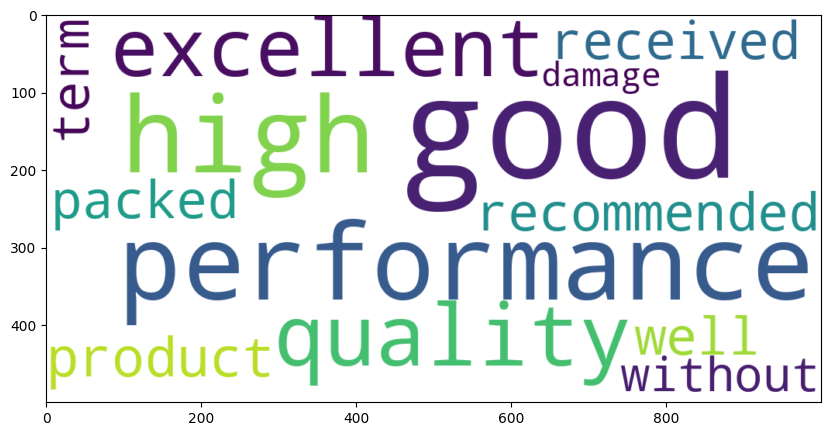

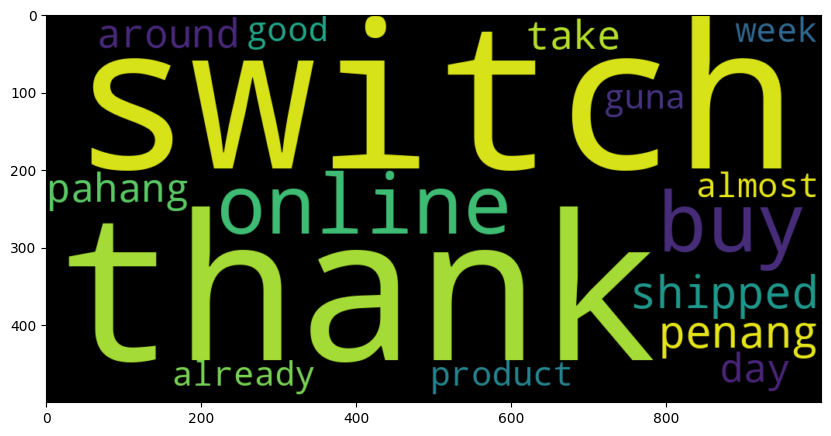

In [42]:
#word cloud

# positive
plt.figure(figsize = (10,10))
positive2_text = norm_train_text[1]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'white')
positive2_words = WC2.generate(positive2_text)
plt.imshow(positive2_words, interpolation='bilinear')
plt.show

#negative
plt.figure(figsize = (10,10))
negative2_text = norm_train_text[8]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'black')
negative2_words = WC2.generate(negative2_text)
plt.imshow(negative2_words, interpolation='bilinear')
plt.show

### K-Nearest Neighbor (KNN) 

In [43]:
model = KNeighborsClassifier(n_neighbors=4)
model_bow = model.fit(cv_train_text, train_score)
model_tfidf = model.fit(tv_train_text, train_score)
model_bow_predict = model.predict(cv_test_text)
model_tfidf_predict = model.predict(tv_test_text)
model_bow_score = accuracy_score(test_score, model_bow_predict)
model_tfidf_score = accuracy_score(test_score,model_tfidf_predict)

/home/user3/wenjie/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/user3/wenjie/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
# compare
output = pd.DataFrame({"Model":['KNN with bag of words','KNN with tfidf features'],
                      "Accuracy":[model_bow_score, model_tfidf_score]})
output

,Model,Accuracy
0,KNN with bag of words,0.969962
1,KNN with tfidf features,0.971214


In [45]:
# confusion matrix
cm2_bow = confusion_matrix(test_score, model_bow_predict, labels = [1,0])
print(cm2_bow)

# classification report 
model_bow_report = classification_report(test_score, model_bow_predict, target_names = ['Positive','Negative'])
print(model_bow_report)

[[775   1]
 [ 23   0]]
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        23
    Negative       0.97      1.00      0.98       776

    accuracy                           0.97       799
   macro avg       0.49      0.50      0.49       799
weighted avg       0.94      0.97      0.96       799



<function matplotlib.pyplot.show(close=None, block=None)>

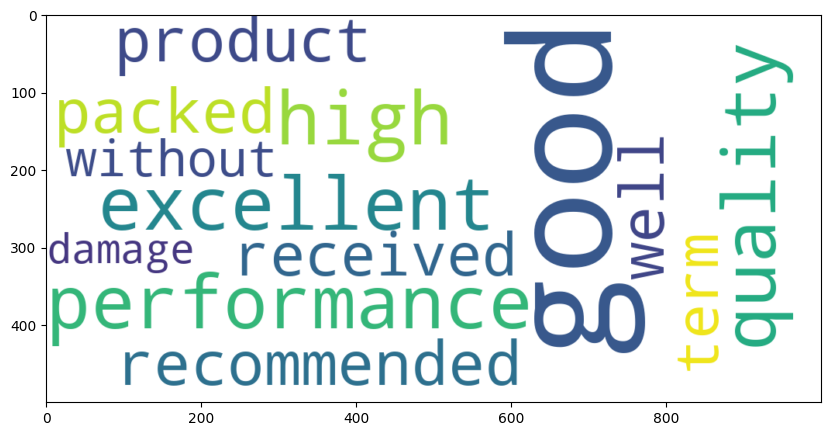

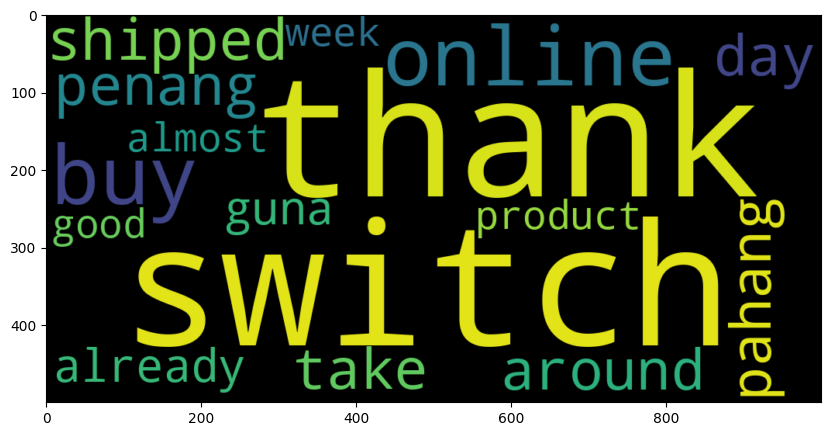

In [46]:
#word cloud

# positive
plt.figure(figsize = (10,10))
positive2_text = norm_train_text[1]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'white')
positive2_words = WC2.generate(positive2_text)
plt.imshow(positive2_words, interpolation='bilinear')
plt.show

#negative
plt.figure(figsize = (10,10))
negative2_text = norm_train_text[8]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'black')
negative2_words = WC2.generate(negative2_text)
plt.imshow(negative2_words, interpolation='bilinear')
plt.show

### Random Forest

In [47]:
rf_model = RandomForestClassifier(n_estimators=40)
rf_model_bow = rf_model.fit(cv_train_text, train_score)
rf_model_tfidf = rf_model.fit(tv_train_text, train_score)
rf_model_bow_predict = rf_model.predict(cv_test_text)
rf_model_tfidf_predict = rf_model.predict(tv_test_text)
rf_model_bow_score = accuracy_score(test_score, rf_model_bow_predict)
rf_model_tfidf_score = accuracy_score(test_score,rf_model_tfidf_predict)

/tmp/ipykernel_28886/2221512184.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_bow = rf_model.fit(cv_train_text, train_score)
/tmp/ipykernel_28886/2221512184.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_tfidf = rf_model.fit(tv_train_text, train_score)


In [48]:
# confusion matrix
cm2_bow = confusion_matrix(test_score, rf_model_bow_predict, labels = [1,0])
print(cm2_bow)

# classification report 
rf_model_bow_report = classification_report(test_score, rf_model_bow_predict, target_names = ['Positive','Negative'])
print(rf_model_bow_report)

[[776   0]
 [ 23   0]]
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        23
    Negative       0.97      1.00      0.99       776

    accuracy                           0.97       799
   macro avg       0.49      0.50      0.49       799
weighted avg       0.94      0.97      0.96       799



/home/user3/wenjie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user3/wenjie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user3/wenjie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

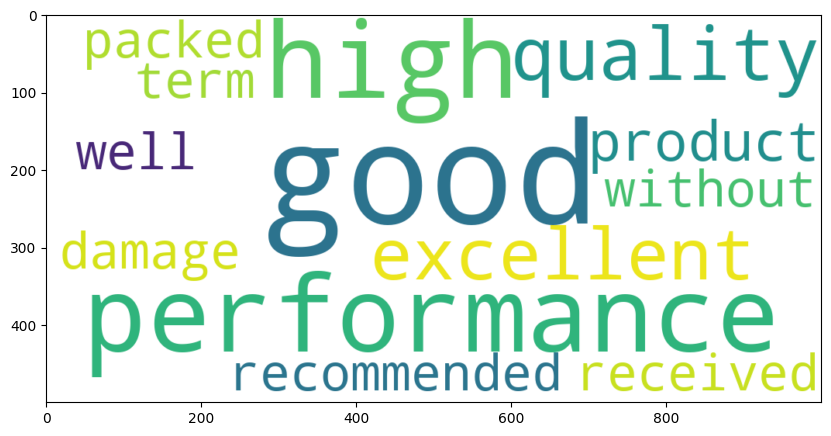

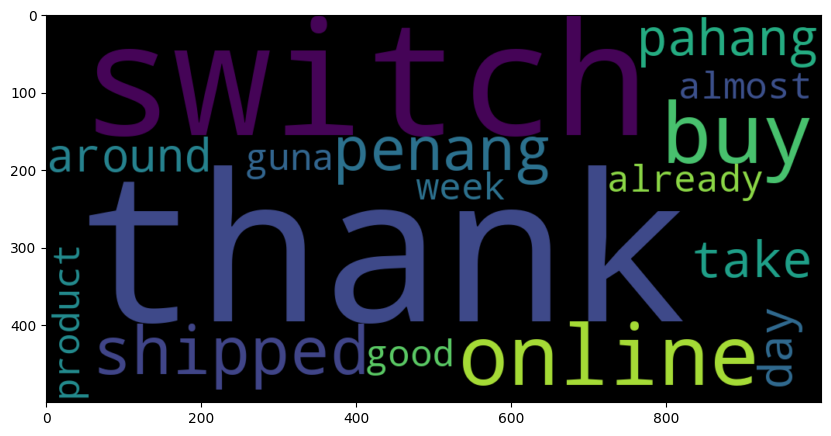

In [49]:
#word cloud

# positive
plt.figure(figsize = (10,10))
positive2_text = norm_train_text[1]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'white')
positive2_words = WC2.generate(positive2_text)
plt.imshow(positive2_words, interpolation='bilinear')
plt.show

#negative
plt.figure(figsize = (10,10))
negative2_text = norm_train_text[8]
WC2 = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5, background_color = 'black')
negative2_words = WC2.generate(negative2_text)
plt.imshow(negative2_words, interpolation='bilinear')
plt.show

In [55]:
df.head()

,brand,delivery_service,description,model,product_quality,rating,seller_service,username,variation,comment
0,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,n*****s,"Space Black,128GB",performance high quality fast delivery quality...
1,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,mumys_baby,"Deep Purple,256GB",performance high quality excellent good produc...
2,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,Apple iPhone 14 Pro,5,positive,5.0,rashidmailbox,"Deep Purple,128GB",quality best performance best fast delivery it...
3,Apple,5.0,iPhone\u00a014\u00a0Pro. Capture incredible de...,[Pre-order] Apple iPhone 14 Pro [ETA: 07-10-20...,5,positive,5.0,m*****5,"Silver,256GB",best
4,Apple,nan,"Shoot 4K videos, beautiful portraits, and swee...",Apple iPhone 11 128GB,5,positive,nan,a*****4,White,buy shipped soon placed buy excellent service ...


## Implementing TextBlob

In [56]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define a function to get the sentiment of a given text using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the get_textblob_sentiment function to the 'comment' column to get the TextBlob sentiment scores
df['TextBlob_Polarity'], df['TextBlob_Subjectivity'] = zip(*df['comment'].apply(get_textblob_sentiment))

# Define a function to get the sentiment of a given text using VADER
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu'], scores['compound']

# Apply the get_vader_sentiment function to the 'comment' column to get the VADER sentiment scores
df['Vader_Polarity'], df['Vader_Sentiment'], df['Vader_Neutral'], df['Vader_Compound'] = zip(*df['comment'].apply(get_vader_sentiment))

# Define a function to categorize the sentiment scores into positive, neutral, or negative
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the categorize_sentiment function to the 'Vader_Compound' column to get the VADER sentiment categories
df['Vader_Sentiment_Category'] = df['Vader_Compound'].apply(categorize_sentiment)

# Create a new DataFrame called sentimentAnalysis that includes the columns 'comment', 'TextBlob_Polarity', 'TextBlob_Subjectivity', 'Vader_Polarity', 'Vader_Sentiment', 'Vader_Neutral', 'Vader_Compound', and 'Vader_Sentiment_Category'
sentimentAnalysis = df[['comment', 'TextBlob_Polarity', 'TextBlob_Subjectivity', 'Vader_Polarity', 'Vader_Sentiment', 'Vader_Neutral', 'Vader_Compound', 'Vader_Sentiment_Category']].copy()

# Print the resulting DataFrame
print(sentimentAnalysis)

                                                comment  TextBlob_Polarity  \
0     performance high quality fast delivery quality...           0.494286   
1     performance high quality excellent good produc...           0.640000   
2     quality best performance best fast delivery it...           0.521875   
3                                                  best           1.000000   
4     buy shipped soon placed buy excellent service ...           0.266667   
...                                                 ...                ...   
3494  shipping late thats fine bcs phone came good t...           0.323333   
3495  seller ship okla speed suddenly branch dhl clo...           0.173810   
3496  long want buy best ever price rm buy received ...           0.436905   
3497  bought wife like well received request get xtr...           0.466667   
3498  allah first time using iphone buy good shopee ...           0.456250   

      TextBlob_Subjectivity  Vader_Polarity  Vader_Sentiment  V

In [57]:
sentimentAnalysis.tail()

,comment,TextBlob_Polarity,TextBlob_Subjectivity,Vader_Polarity,Vader_Sentiment,Vader_Neutral,Vader_Compound,Vader_Sentiment_Category
3494,shipping late thats fine bcs phone came good t...,0.323333,0.540000,0.432,0.000,0.568,0.7650,positive
3495,seller ship okla speed suddenly branch dhl clo...,0.173810,0.657143,0.186,0.188,0.626,-0.0258,negative
3496,long want buy best ever price rm buy received ...,0.436905,0.490476,0.416,0.061,0.523,0.9392,positive
3497,bought wife like well received request get xtr...,0.466667,0.833333,0.375,0.000,0.625,0.8689,positive
3498,allah first time using iphone buy good shopee ...,0.456250,0.629167,0.243,0.055,0.702,0.8225,positive


In [60]:
negative_comments = sentimentAnalysis[sentimentAnalysis['Vader_Sentiment_Category'] == 'negative']
print(negative_comments)

                                                comment  TextBlob_Polarity  \
23    delivery quite late cause raya haji understand...          -0.166667   
53    buy wife criticism  ude  cape friday make paym...           0.000000   
71    already  cape  uded hehehe excited delivery al...           0.375000   
82             kate sale price near shop tired wait day          -0.150000   
94    late buy payment july ship july receive august...          -0.225000   
...                                                 ...                ...   
3448  item received without bubble wrap honestly dis...          -0.216667   
3453  found screen defect let   go newly received ip...           0.136364   
3464  buy come february received come february consi...           0.030000   
3493  bit disappointed shipping protection sarawak t...          -0.128333   
3495  seller ship okla speed suddenly branch dhl clo...           0.173810   

      TextBlob_Subjectivity  Vader_Polarity  Vader_Sentiment  V

In [61]:
positive_comments = sentimentAnalysis[sentimentAnalysis['Vader_Sentiment_Category'] == 'positive']
print(positive_comments)

                                                comment  TextBlob_Polarity  \
0     performance high quality fast delivery quality...           0.494286   
1     performance high quality excellent good produc...           0.640000   
2     quality best performance best fast delivery it...           0.521875   
3                                                  best           1.000000   
4     buy shipped soon placed buy excellent service ...           0.266667   
...                                                 ...                ...   
3492  yesterday buy today courier select dhl reason ...           1.000000   
3494  shipping late thats fine bcs phone came good t...           0.323333   
3496  long want buy best ever price rm buy received ...           0.436905   
3497  bought wife like well received request get xtr...           0.466667   
3498  allah first time using iphone buy good shopee ...           0.456250   

      TextBlob_Subjectivity  Vader_Polarity  Vader_Sentiment  V

## Save the file into mongodb

In [62]:
#pip install pymongo

In [63]:
import pymongo
from pymongo import MongoClient

In [64]:
client = MongoClient('mongodb://127.0.0.1:27017/')

In [65]:
db = client['wjAssignment']
collection = db['wjcollection']

In [66]:
# Convert the DataFrame to a list of dictionaries
data = sentimentAnalysis.to_dict('records')

In [67]:
# Insert the data into the MongoDB collection
collection.insert_many(data)